# Лабораторная работа по машинному обучению №2

## Выполнила Ерофеева А. Д. 15-АС

## Цель лабораторной работы – получение навыков работы с методами 
## классификации.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
warnings.filterwarnings("ignore")

%matplotlib inline

DZoo = pd.read_csv('zoo.csv')

### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

###### Этот набор данных состоит из 101 жиаотного из зоопарка. 16 показателей с различными чертами для описания животных. Существует 7 типов: млекопитающие, птицы, рептилии, рыбы, амфибии, жуки и беспозвоночные.

###### Информация об атрибутах: 

###### animal_name: уникально для каждого экземпляра

* Волосы
* Перья
* Яйца
* Молоко
* Воздушный
* Водный
* Хищник
* Зубастый
* Позвоночный
* Дышащий
* Ядовитый
* Плавники
* Количество ног (область значений:{0,2,4,5,6,8})
* Хвостатые
* Домашние
* Размером с кота


In [43]:
DZoo.shape

(101, 18)

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [44]:
DZoo = DZoo.drop_duplicates()
DZoo = DZoo.dropna()
DZoo.drop(['animal_name'], axis=1, inplace=True)
DZoo.shape

(101, 17)

In [45]:
DZoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


### 3. Оцените сбалансированность данных по классам (постройте гистограмму)

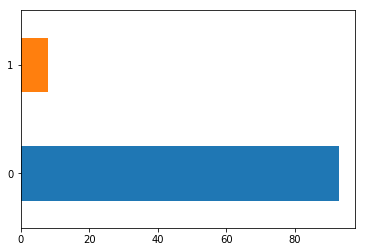

In [46]:
DZoo['venomous'].value_counts().plot.barh()
plt.show()

Делаем вывод, что данные по классам не сбалансированны

### 4. Выполните масштабирование количественных признаков

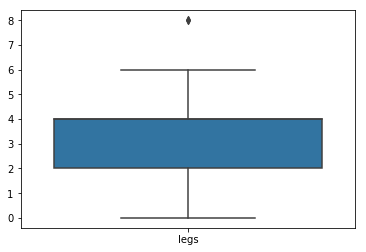

In [47]:
numeric_attributes = ['legs']
sns.boxplot(data=DZoo[numeric_attributes])

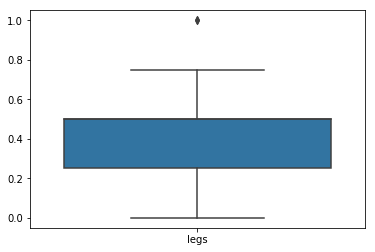

In [48]:
scaler = preprocessing.MinMaxScaler()
DZoo[numeric_attributes] = scaler.fit_transform(DZoo[numeric_attributes].values.astype(float))
sns.boxplot(data=DZoo[numeric_attributes])

### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

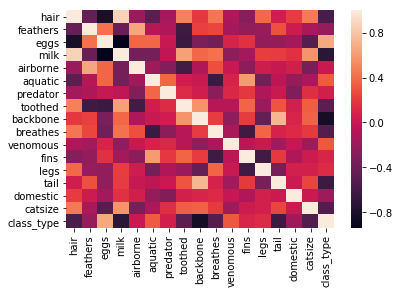

In [49]:
sns.heatmap(DZoo.corr())

In [51]:
DZoo.drop(['feathers', 'milk', 'backbone'], axis=1, inplace=True)
DZoo.head()

,hair,eggs,airborne,aquatic,predator,toothed,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,0,1,1,1,0,0,0.5,0,0,1,1
1,1,0,0,0,0,1,1,0,0,0.5,1,0,1,1
2,0,1,0,1,1,1,0,0,1,0.0,1,0,0,4
3,1,0,0,0,1,1,1,0,0,0.5,0,0,1,1
4,1,0,0,0,1,1,1,0,0,0.5,1,0,1,1


### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества)

In [56]:
X, Y = DZoo.drop('class_type', axis=1), DZoo['class_type']
Y = label_binarize(Y, classes=[x for x in range(7)])
n_classes = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [54]:
clf_perceptron = OneVsRestClassifier(linear_model.Perceptron())
params = {
      'estimator__alpha': np.linspace(0, 1, 50)[1:],
      'estimator__max_iter': [(x+1)*10 for x in range(5)],
      }
param_search = GridSearchCV(estimator=clf_perceptron, param_grid=params)
param_search.fit(X_train, Y_train)
Y_score = param_search.best_estimator_.fit(X_train, Y_train).decision_function(X_test)
print('Accuracy: {}'.format(accuracy_score(param_search.best_estimator_.predict(X_test), Y_test)))
print('Best score: {}'.format(param_search.best_score_))

Accuracy: 0.9032258064516129
Best score: 0.8


In [62]:
knn = neighbors.KNeighborsClassifier()
DZoo1 = DZoo.copy()
params = {'n_neighbors': list(range(1, 30))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('best train score: ', best_score,
      '\t at neighbors number: ', best_num)

best train score:  0.9285714285714286 	 at neighbors number:  3


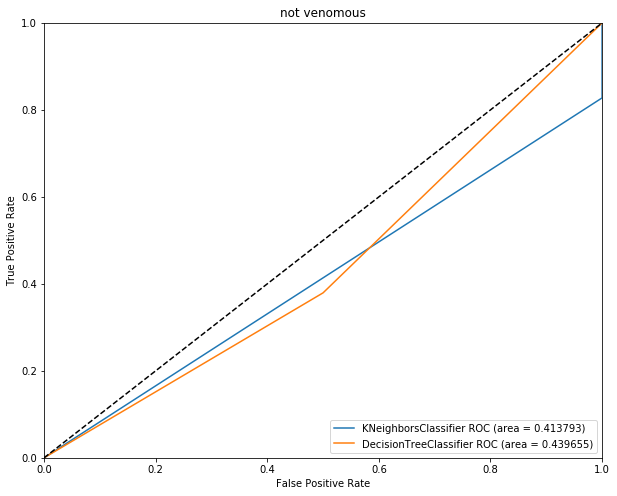

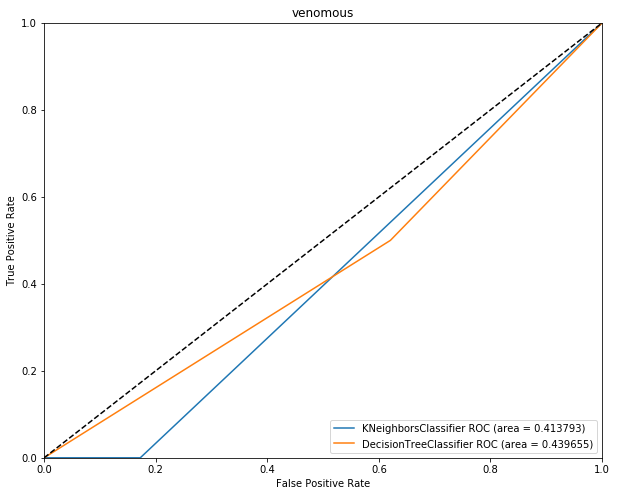

In [63]:
plt.figure(figsize=(10,8))
# K соседей
knn = KNeighborsClassifier ( n_neighbors =best_num)
probas_knn0 = knn.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_knn0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

# решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_dtc0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('not venomous')
plt.show()


plt.figure(figsize=(10,8))
# K соседей
knn = KNeighborsClassifier( n_neighbors = best_num)
probas_knn1 = knn.fit(X_train, y_train).predict_proba (X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_knn1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 
# решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc1 = dtc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_dtc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   
# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('venomous')
plt.show()

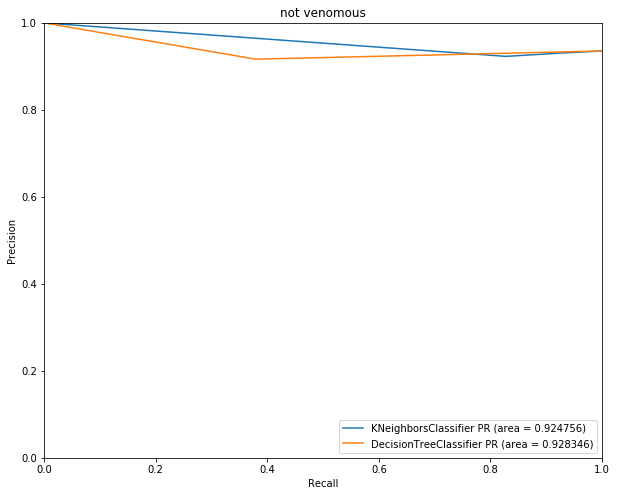

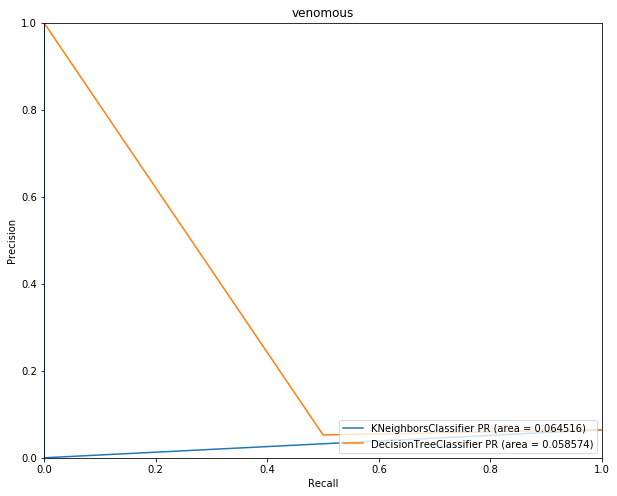

In [66]:
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_knn1[:,0])
aps_knn1 = average_precision_score(y_test_invers,probas_knn1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn1)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_dtc1[:,0])
aps_dtc1 = average_precision_score(y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('not venomous')
plt.show()


plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test, probas_knn0[:,1])
aps_knn0 = average_precision_score(y_test,probas_knn0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn0)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('venomous')
plt.show()